<a href="https://colab.research.google.com/github/ariefpurnamamuharram/MyTransformerResearch/blob/master/Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with PyTorch
____
YouTube videos:
- https://www.youtube.com/watch?v=c36lUUr864M

Basics of Tensor:
- torch.add(x,y) --> Addition of x and y
- torch.mul(x,y) --> Multiplication of x and y
- torch.rand(n)
- torch.sub(x,y) --> Substraction of x and y
- torch.view(1) --> Reshaping Torch Tensor

GPU functions:
- torch.cuda.is_available() --> Check if CUDA is available

In [27]:
# Install the required packages
!pip install torch torchvision torchaudio
!pip install scikit-learn

In [ ]:
# Basics of Tensor
import torch
import numpy as np

if torch.cuda.is_available(): # Check if CUDA is available
  device = torch.device("cuda") # Select CUDA device (ex: "CUDA:0")
  x = torch.ones(5, device=device) # Move Tensor to the GPU
  y = torch.ones(5)
  y = y.to(device) # Move Tensor to the GPU
  z = x + y # Processed at the GPU level
  # z.numppy(), will produce an error. NumPy only can be processed at CPU level
  z = z.to("CPU") # Move the Tensor to the CPU

In [ ]:
# Autograd
# Gradient (Grad) is important in our model optimization

import torch

x = torch.rand(3, requires_grad=True) # By default is False
print(x)

y = x+2
print(y)
z = y*y*2
#z = z.mean()
print(z)

v = torch.tensor([0.1, 1.0, 0.01], dtype=torch.float32)
z.backward(v) # dz/dx, Jacobian products
print(x.grad)

# ----
# Stop PyTorch treating the gradient functions and tracking history in 
# our compational graphs.
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad()

a = torch.rand(3, requires_grad=True) # By default is False
print(a)

a.requires_grad_(False)
print(a)

# ---

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  # Clear it before the next epoch so the grad value is still right.
  weights.grad.zero_()

tensor([0.3010, 0.5801, 0.3912], requires_grad=True)
tensor([2.3010, 2.5801, 2.3912], grad_fn=<AddBackward0>)
tensor([10.5891, 13.3141, 11.4357], grad_fn=<MulBackward0>)
tensor([ 0.9204, 10.3205,  0.0956])
tensor([0.2824, 0.7041, 0.6977], requires_grad=True)
tensor([0.2824, 0.7041, 0.6977])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
# Backpropagation
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True) # Initial weight

# Forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2

print(loss) # Print loss

# Backward pass
loss.backward()
print(w.grad)

### Update weights
### next forward and backwards


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [9]:
# Gradient Descent using Autograd
# ----
# - Prediction: PyTorch Model
# - Gradient computation: Autograd
# - Loss computation: PyTorch Loss
# - Parameter updates: PyTorch Optimizer

# Manual way, using NumPy

import numpy as np

# Linear regression
# f = W * x

# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# Model prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

# Gradient
# MSE = 1/N * (w*X - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Predicted before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X,Y,y_pred)

  # update weights
  w -= learning_rate * dw

  if epoc % 1 == 0:
    print(f'epoch {epoc+1}: w = {w:.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {forward(5):.3f}')


Predicted before training: f(5) = 0.000
epoch 1: w = 1.2, loss = 30.00000000
epoch 2: w = 1.68, loss = 4.79999924
epoch 3: w = 1.87, loss = 0.76800019
epoch 4: w = 1.95, loss = 0.12288000
epoch 5: w = 1.98, loss = 0.01966083
epoch 6: w = 1.99, loss = 0.00314574
epoch 7: w = 2.0, loss = 0.00050331
epoch 8: w = 2.0, loss = 0.00008053
epoch 9: w = 2.0, loss = 0.00001288
epoch 10: w = 2.0, loss = 0.00000206
epoch 11: w = 2.0, loss = 0.00000033
epoch 12: w = 2.0, loss = 0.00000005
epoch 13: w = 2.0, loss = 0.00000001
epoch 14: w = 2.0, loss = 0.00000000
epoch 15: w = 2.0, loss = 0.00000000
epoch 16: w = 2.0, loss = 0.00000000
epoch 17: w = 2.0, loss = 0.00000000
epoch 18: w = 2.0, loss = 0.00000000
epoch 19: w = 2.0, loss = 0.00000000
epoch 20: w = 2.0, loss = 0.00000000
Predicted after training: f(5) = 10.000


In [13]:
# Gradient Descent using Autograd
# ----
# - Prediction: PyTorch Model
# - Gradient computation: Autograd
# - Loss computation: PyTorch Loss
# - Parameter updates: PyTorch Optimizer

# Tensor way, using PyTorch

import torch

# Linear regression
# f = W * x

# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Model prediction
def forward(x):
  return w * x

# Loss = MSE
def loss(y, y_predicted):
  return ((y_predicted - y)**2).mean()

print(f'Predicted before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = bakcward pass
  l.backward() #dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoc % 10 == 0:
    print(f'epoch {epoc+1}: w = {w:.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {forward(5):.3f}')

Predicted before training: f(5) = 0.000
epoch 1: w = 0.3, loss = 30.00000000
epoch 11: w = 1.67, loss = 1.16278565
epoch 21: w = 1.93, loss = 0.04506890
epoch 31: w = 1.99, loss = 0.00174685
epoch 41: w = 2.0, loss = 0.00006770
epoch 51: w = 2.0, loss = 0.00000262
epoch 61: w = 2.0, loss = 0.00000010
epoch 71: w = 2.0, loss = 0.00000000
epoch 81: w = 2.0, loss = 0.00000000
epoch 91: w = 2.0, loss = 0.00000000
Predicted after training: f(5) = 10.000


In [25]:
# Training Pipeline: Model/Loss/Optimizer

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn

# Rows as the number of the samples
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features) # 4 samples with 1 feature

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Predicted before training: f(5) = {model(X_test).item()}')

# Training
learning_rate = 0.01
n_iters = 1000

loss = nn.MSELoss()

# Stochastic Gradient Descent (SGD)
# model.parameters contains the weights
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoc in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = bakcward pass
  l.backward() #dl/dw

  # update weights
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoc % 100 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoc+1}: w = {w[0][0].item():.3}, loss = {l:.8f}')

print(f'Predicted after training: f(5) = {model(X_test).item()}')

4 1
Predicted before training: f(5) = -3.603912353515625
epoch 1: w = -0.318, loss = 55.37839508
epoch 101: w = 1.79, loss = 0.06692869
epoch 201: w = 1.84, loss = 0.03674300
epoch 301: w = 1.88, loss = 0.02017150
epoch 401: w = 1.91, loss = 0.01107389
epoch 501: w = 1.94, loss = 0.00607944
epoch 601: w = 1.95, loss = 0.00333753
epoch 701: w = 1.96, loss = 0.00183227
epoch 801: w = 1.97, loss = 0.00100590
epoch 901: w = 1.98, loss = 0.00055222
Predicted after training: f(5) = 9.970149040222168


epoch: 10, loss = 4436.9639
epoch: 20, loss = 3308.0378
epoch: 30, loss = 2491.6191
epoch: 40, loss = 1900.5485
epoch: 50, loss = 1472.1865
epoch: 60, loss = 1161.4496
epoch: 70, loss = 935.8409
epoch: 80, loss = 771.9070
epoch: 90, loss = 652.6998
epoch: 100, loss = 565.9565


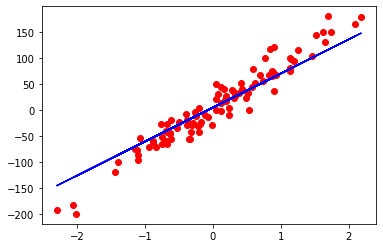

In [36]:
# Linear Regression

# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#     - forward pass: compute prediction
#     - backward pass: gradients
#     - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
ouput_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, Y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()